<a href="https://colab.research.google.com/github/Manaswa-S/Evolve/blob/colab/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec

dataset = api.load("text8")  # ~100MB cleaned Wikipedia text

model = Word2Vec(
    sentences=dataset,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=1,  # 1 = Skip-gram (better semantics)
    epochs=5
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.wv.most_similar("king")


[('prince', 0.782680094242096),
 ('valdemar', 0.7312889099121094),
 ('haakon', 0.7286422848701477),
 ('pretender', 0.7197614908218384),
 ('queen', 0.7194229960441589),
 ('vii', 0.7110482454299927),
 ('canute', 0.7052925229072571),
 ('kings', 0.7026472091674805),
 ('throne', 0.690568745136261),
 ('jeroboam', 0.6892608404159546)]

In [ ]:
model.wv.most_similar(
    positive=["king", "woman"],
    negative=["man"]
)


[('queen', 0.6370764374732971),
 ('daughter', 0.6308069229125977),
 ('isabella', 0.6182064414024353),
 ('haakon', 0.6125888228416443),
 ('prince', 0.6081828474998474),
 ('throne', 0.6054359674453735),
 ('vii', 0.5948901772499084),
 ('sigismund', 0.5929566025733948),
 ('matilda', 0.5915595889091492),
 ('viii', 0.5908864736557007)]

In [ ]:
vec = model.wv["queen"]
print(len(vec))
print(vec[:100])


100
[ 0.36201155  0.415074    0.6142036   0.3321907   0.13457966 -0.05791852
 -0.28521654  0.79904556 -0.5454341   0.14955474  0.05838446 -0.8990544
 -0.08898965  0.4036734  -0.03001348 -0.5179269  -0.12486435 -0.0796155
  0.38397965 -0.46227664  0.24113092  0.41520134  0.12776041 -0.01779227
 -0.39370078  0.2912272   0.67771196 -0.5262162  -0.34489623 -0.5420599
  0.38058853  0.41307533 -0.28554946 -0.0024643  -0.20130163 -0.16110265
  0.12400875 -0.8267721  -0.41974822  0.23404296  0.12897678  0.32115632
 -0.5430489  -0.09573439  0.19690461 -0.28394413  0.04982773  0.31325537
  0.49316195  0.12341687  0.3781595  -0.20097741 -0.26397064 -0.43896022
 -0.4935264  -0.04735542  0.07964676  0.32558444 -0.11994647 -0.34098163
  0.0501841   0.2789566   0.16546518 -0.00373326 -0.4329651  -0.46774125
 -0.31876194 -0.01012941 -0.19129497  0.49134415  0.11771015  0.5029233
  0.19620861  0.09312695  0.13310108 -0.15410888  0.53731096  0.22336708
 -0.51309204  0.2490374  -0.44542313 -0.35402074  0

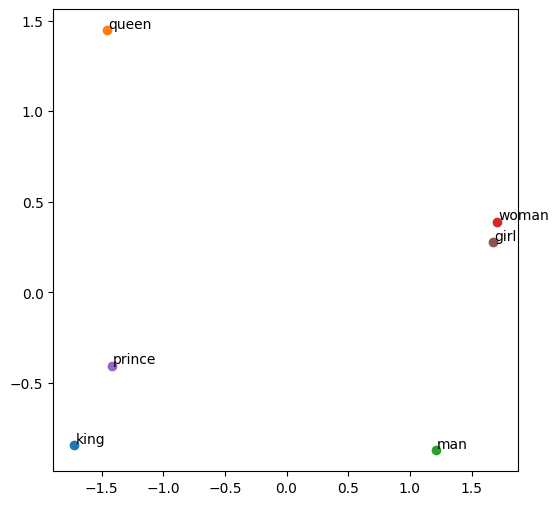

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["king", "queen", "man", "woman", "prince", "girl"]
vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(6,6))
for i, word in enumerate(words):
    plt.scatter(reduced[i,0], reduced[i,1])
    plt.text(reduced[i,0]+0.01, reduced[i,1]+0.01, word)

plt.show()


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 28.1 MB/s eta 0:00:00


In [ ]:
!./scraper.bin compress

COMPRESS DONE
Stopping the compressor


In [ ]:
from gensim.utils import simple_preprocess

sentences = []

with open("./dump/wikipedia/Machine learning/compress.txt", "r", encoding="utf-8") as f:
    for line in f:
        tokens = simple_preprocess(line)
        if tokens:
            sentences.append(tokens)



[['redirect'], ['machine', 'learning', 'is', 'an', 'area', 'of', 'artificial', 'intelligence', 'involving', 'developing', 'techniques', 'to', 'allow', 'computers', 'to', 'learn', 'more', 'specifically', 'machine', 'learning', 'is', 'method', 'for', 'creating', 'computer', 'programs', 'by', 'the', 'analysis', 'of', 'data', 'sets', 'rather', 'than', 'the', 'intuition', 'of', 'engineers'], ['machine', 'learning', 'algorithms', 'are', 'organized', 'into', 'taxonomy', 'based', 'on', 'the', 'desired', 'outcome', 'of', 'the', 'algorithm', 'common', 'algorithm', 'types', 'include']]


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=50,
    window=5,
    min_count=1,   # important for small datasets
    workers=4,
    sg=0,
    epochs=3,
    compute_loss=True
)


In [ ]:
model.wv.most_similar("machine")


[('association', 0.45981356501579285),
 ('innovative', 0.4516582489013672),
 ('acticities', 0.4387424886226654),
 ('colleagues', 0.4385039508342743),
 ('hexacta', 0.43529677391052246),
 ('active', 0.42870673537254333),
 ('force', 0.420193076133728),
 ('cavouras', 0.4190738797187805),
 ('interceptation', 0.41349878907203674),
 ('tsa', 0.40989547967910767)]